In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F


import os
import numpy as np
import math

from Stationary.core import *
from Stationary.utils import *

from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

import torch.nn.functional as F
import copy

from collections import defaultdict

np.random.seed(0)
torch.manual_seed(0)

In [47]:
test_family = 'NonLinearModel_NonLinearTask'
test_name = 'test11'

In [48]:
import concurrent.futures
import multiprocessing as mp

from external import *

iterations = 20

if __name__ == '__main__':
  
    SEEDS = np.linspace(1, iterations, iterations, dtype=int).tolist()

    error_list = []
    score_list = []
    error_list_fedavg = []
    score_list_fedavg = []

    with concurrent.futures.ProcessPoolExecutor(max_workers=mp.cpu_count(), mp_context=mp.get_context("spawn")) as executor:
            for error, score, error_fedavg, score_fedavg in executor.map(single_iteration, SEEDS):
                error_list.append(error)
                score_list.append(score)
                error_list_fedavg.append(error_fedavg)
                score_list_fedavg.append(score_fedavg)

In [49]:
err = []
err_std = []
for i in range(0, len(error_list[0])):
    s = 0
    e = []
    for k in error_list:
        s += k[i]
        e.append(k[i])
    err.append(s / len(error_list))
    err_std.append(np.std(e))

sc = []
sc_std = []
for i in range(0, len(score_list[0])):
    s = 0
    e = []
    for k in score_list:
        s += k[i]
        e.append(k[i])
    sc.append(s / len(score_list))
    sc_std.append(np.std(e))

err_s = []
err_s_std = []
for i in range(0, len(error_list_fedavg[0])):
    s = 0
    e = []
    for k in error_list_fedavg:
        s += k[i]
        e.append(k[i])
    err_s.append(s / len(error_list_fedavg))
    err_s_std.append(np.std(e))

sc_s = []
sc_s_std = []
for i in range(0, len(score_list_fedavg[0])):
    s = 0
    e = []
    for k in score_list_fedavg:
        s += k[i]
        e.append(k[i])
    sc_s.append(s / len(score_list_fedavg))
    sc_s_std.append(np.std(e))

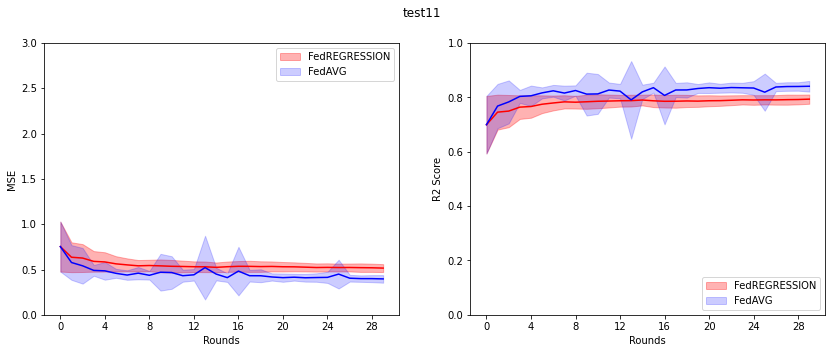

In [50]:
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator

#plt.figure(figsize=(20,5))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle(test_name)


x = np.arange(len(error_list[0]))

ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))


ax1.fill_between(x, np.array(err)+np.array(err_std), np.array(err)-np.array(err_std), color='red', label='FedREGRESSION', alpha=0.3)
ax1.fill_between(x, np.array(err_s)+np.array(err_s_std), np.array(err_s)-np.array(err_s_std), color='blue', label='FedAVG', alpha=0.2)
ax1.plot(x, err, color='red')
ax1.plot(x, err_s, color='blue')

ax1.legend(loc='upper right')

ax1.set_xlabel("Rounds")
ax1.set_ylabel("MSE")


ax1.set_ylim(ymin=0, ymax=3)


ax2.fill_between(x, np.array(sc)+np.array(sc_std), np.array(sc)-np.array(sc_std), color='red', label='FedREGRESSION', alpha=0.3)
ax2.fill_between(x, np.array(sc_s)+np.array(sc_s_std), np.array(sc_s)-np.array(sc_s_std), color='blue', label='FedAVG', alpha=0.2)
ax2.plot(x, sc, color='red')
ax2.plot(x, sc_s, color='blue')
ax2.legend(loc='lower right')

ax2.set_xlabel("Rounds")
ax2.set_ylabel("R2 Score")

ax2.set_ylim(ymin=0, ymax=1)




plt.draw()

plt.savefig("Results/"+test_family+"/plots/"+test_name+".svg")

In [51]:
import pandas as pd


d = {'Error_FedREG': err, 
     'Error_FedREG_std': err_std,
     'Score_FedREG': sc, 
     'Score_FedREG_std': sc_std,
     'Error_FedAVG': err_s, 
     'Error_FedAVG_std': err_s_std,
     'Score_FedAVG': sc_s, 
     'Score_FedAVG_std': sc_s_std}

df = pd.DataFrame(data=d)

df.to_csv("Results/"+test_family+"/data/"+test_name+".csv", index=False)

In [52]:
pd.read_csv("Results/"+test_family+"/data/"+test_name+".csv")

,Error_FedREG,Error_FedREG_std,Score_FedREG,Score_FedREG_std,Error_FedAVG,Error_FedAVG_std,Score_FedAVG,Score_FedAVG_std
0,0.752888,0.275934,0.699379,0.105951,0.752888,0.275934,0.699379,0.105951
1,0.635415,0.164622,0.745620,0.064228,0.577171,0.191590,0.768023,0.081489
2,0.626250,0.153821,0.749516,0.059199,0.540747,0.196697,0.783226,0.079103
3,0.589610,0.113538,0.764062,0.043329,0.490224,0.059310,0.803524,0.023806
4,0.583544,0.106665,0.766369,0.041344,0.485100,0.097842,0.805744,0.037607
5,0.562398,0.084154,0.774766,0.032662,0.457694,0.049293,0.816551,0.020122
6,0.551005,0.071677,0.779350,0.027311,0.438717,0.052445,0.824097,0.021722
7,0.540629,0.063599,0.783474,0.024249,0.459598,0.067704,0.815800,0.027278
8,0.544017,0.063217,0.782196,0.023306,0.436103,0.047429,0.825211,0.018905
9,0.540132,0.070668,0.783801,0.025846,0.469919,0.202882,0.811917,0.078787


In [6]:
import pandas as pd 


In [48]:
test_family = 'NonLinearModel_LinearTask'
test_name = 'test3'

df = pd.read_csv("Results/"+test_family+"/data/"+test_name+".csv")

In [49]:
err = df['Error_FedREG'].tolist()
err_std = df['Error_FedREG_std'].tolist()
err_s = df['Error_FedAVG'].tolist()
err_s_std = df['Error_FedAVG_std'].tolist()

sc = df['Score_FedREG'].tolist()
sc_std = df['Score_FedREG_std'].tolist()
sc_s = df['Score_FedAVG'].tolist()
sc_s_std = df['Score_FedAVG_std'].tolist()

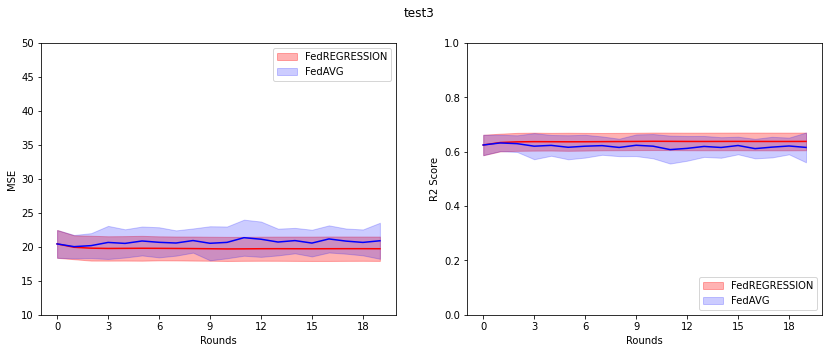

In [52]:
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator

#plt.figure(figsize=(20,5))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle(test_name)


x = np.arange(len(err))

ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))


ax1.fill_between(x, np.array(err)+np.array(err_std), np.array(err)-np.array(err_std), color='red', label='FedREGRESSION', alpha=0.3)
ax1.fill_between(x, np.array(err_s)+np.array(err_s_std), np.array(err_s)-np.array(err_s_std), color='blue', label='FedAVG', alpha=0.2)
ax1.plot(x, err, color='red')
ax1.plot(x, err_s, color='blue')

ax1.legend(loc='upper right')

ax1.set_xlabel("Rounds")
ax1.set_ylabel("MSE")


ax1.set_ylim(ymin=10, ymax=50)


ax2.fill_between(x, np.array(sc)+np.array(sc_std), np.array(sc)-np.array(sc_std), color='red', label='FedREGRESSION', alpha=0.3)
ax2.fill_between(x, np.array(sc_s)+np.array(sc_s_std), np.array(sc_s)-np.array(sc_s_std), color='blue', label='FedAVG', alpha=0.2)
ax2.plot(x, sc, color='red')
ax2.plot(x, sc_s, color='blue')
ax2.legend(loc='lower right')

ax2.set_xlabel("Rounds")
ax2.set_ylabel("R2 Score")

ax2.set_ylim(ymin=0, ymax=1)




plt.draw()

plt.savefig("Results/"+test_family+"/plots/"+test_name+"_nlm.svg")